# <font color=blue>Assignments for "Making Predictions"</font>

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
import pandas as pd
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:

df_null = house_prices_df.isna().sum() / len(house_prices_df)
house_prices_df.drop(df_null[df_null > .1].index, axis=1, inplace=True)
house_prices_df.dropna(inplace=True)

cols=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','YearRemodAdd']

df_train = house_prices_df[cols]

MSZoning = pd.get_dummies(house_prices_df['MSZoning'], drop_first=True)
Street = pd.get_dummies(house_prices_df['Street'], drop_first=True)
BsmtQual = pd.get_dummies(house_prices_df['BsmtQual'], drop_first=True)
SaleCondition = pd.get_dummies(house_prices_df['SaleCondition'], drop_first=True)

scaler = StandardScaler()

df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns, index=df_train.index)

X = pd.concat([df_train, MSZoning, Street, BsmtQual,SaleCondition],axis =1)

y = house_prices_df['SalePrice']


- Split your data into train and test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

X_train = sm.add_constant(X_train)

- Estimate your model from the previous lesson in the train set. Assess the goodness of fit of your model.

In [ ]:
results = sm.OLS(y_train, X_train).fit()

display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     250.6
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        12:54:41   Log-Likelihood:                -12677.
No. Observations:                1070   AIC:                         2.540e+04
Df Residuals:                    1049   BIC:                         2.550e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.991e+05    2.5e+04      7.965      0.000     1.5e+05    2.48e+05
OverallQual   2.215e+04   1742.288     12.713      0.000    1.87e+04    2.56e+04
GrLivArea     3.335e+04   1699.893     19.617      0.000       3e+04    3.67e+04
GarageCars    6495.6997   1515.289      4.287      0.000    3522.358    9469.042
TotalBsmtSF   1.614e+04   1441.334     11.199      0.000    1.33e+04     1.9e+04
FullBath     -7779.7122   1608.527     -4.837      0.000   -1.09e+04   -4623.415
YearBuilt     3786.7579   1981.306      1.911      0.056    -101.017    7674.532
YearRemodAdd  7034.3397   1429.210      4.922      0.000    4229.903    9838.776
FV            1.167e+04   1.91e+04      0.610      0.542   -2.59e+04    4.92e+04
RH            6758.9646   2.09e+04      0.323      0.747   -3.43e+04    4.78e+04
RL            1.345e+04   1.84e+04      0.733      0.464   -2.26e+04    4.95e+04
RM           -1805.0156   1.84e+04     -0.098      0.922   -3.79e+04    3.43e+04
Pave          6988.5885   2.12e+04      0.330      0.742   -3.46e+04    4.86e+04
Fa           -4.167e+04   8895.987     -4.685      0.000   -5.91e+04   -2.42e+04
Gd           -4.217e+04   4394.098     -9.598      0.000   -5.08e+04   -3.36e+04
TA           -4.398e+04   5557.759     -7.914      0.000   -5.49e+04   -3.31e+04
AdjLand       2.761e+04   3.45e+04      0.800      0.424   -4.01e+04    9.53e+04
Alloca         -20.0500   1.68e+04     -0.001      0.999   -3.29e+04    3.29e+04
Family       -4025.4054   9651.297     -0.417      0.677    -2.3e+04    1.49e+04
Normal        9545.3101   4517.864      2.113      0.035     680.230    1.84e+04
Partial       2.314e+04   5970.365      3.877      0.000    1.14e+04    3.49e+04
==============================================================================
Omnibus:                      325.918   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31510.174
Skew:                          -0.302   Prob(JB):                         0.00
Kurtosis:                      29.578   Cond. No.                         78.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Predict the house prices in the test set and evaluate the performance of your model using the metrics we mentioned in this lesson.

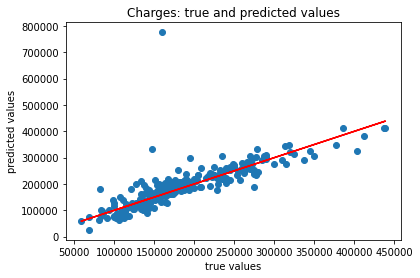




Mean absolute error of the prediction is: 23365.34811805164
Mean squared error of the prediction is: 2269430398.3354983
Root mean squared error of the prediction is: 47638.53900294905
Mean absolute percentage error of the prediction is: 14.199151194424916


In [ ]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print('\n\n')
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


- Is the performance of your model satisfactory? Why?

As a result of the visualization, I can clearly say that the model is quite satisfactory. It has an R-squared result of 0.871, which we can say is quite good.

In addition, the results of error metrics are also satisfactory.

When we look at the plot, we can also see that the blue dots sit quite above the red line.

- Try to improve your model in terms of prediction performance by adding or removing some variables.

In [ ]:
X.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,FV,RH,RL,RM,Pave,Fa,Gd,TA,AdjLand,Alloca,Family,Normal,Partial
0,0.589,0.331,0.203,-0.592,0.776,1.014,0.854,0,0,1,0,1,0,1,0,0,0,0,1,0
1,-0.166,-0.530,0.203,0.410,0.776,0.101,-0.477,0,0,1,0,1,0,1,0,0,0,0,1,0
2,0.589,0.477,0.203,-0.434,0.776,0.946,0.805,0,0,1,0,1,0,1,0,0,0,0,1,0
3,0.589,0.345,1.780,-0.839,-1.051,-1.964,-0.772,0,0,1,0,1,0,0,1,0,0,0,0,0
4,1.345,1.269,1.780,0.121,0.776,0.913,0.706,0,0,1,0,1,0,1,0,0,0,0,1,0


In [ ]:
#cols=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','YearRemodAdd']

df_train = house_prices_df.select_dtypes(exclude='O').drop('SalePrice', axis=1)

MSZoning = pd.get_dummies(house_prices_df['MSZoning'], drop_first=True)
Street = pd.get_dummies(house_prices_df['Street'], drop_first=True)
BsmtQual = pd.get_dummies(house_prices_df['BsmtQual'], drop_first=True)
SaleCondition = pd.get_dummies(house_prices_df['SaleCondition'], drop_first=True)

scaler = StandardScaler()

df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns, index=df_train.index)

X = pd.concat([df_train, MSZoning, Street, BsmtQual,SaleCondition],axis =1)

y = house_prices_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     146.3
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        13:28:11   Log-Likelihood:                -12522.
No. Observations:                1070   AIC:                         2.514e+04
Df Residuals:                    1022   BIC:                         2.538e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.938e+05   2.23e+04      8.687      0.000     1.5e+05    2.38e+05
Id             1461.8805    935.558      1.563      0.118    -373.953    3297.714
MSSubClass    -3448.7163   1211.818     -2.846      0.005   -5826.651   -1070.781
LotArea        6611.6385   1185.039      5.579      0.000    4286.251    8937.026
OverallQual    1.878e+04   1640.051     11.450      0.000    1.56e+04     2.2e+04
OverallCond    7348.5773   1189.668      6.177      0.000    5014.106    9683.049
YearBuilt      8034.4799   2413.679      3.329      0.001    3298.146    1.28e+04
YearRemodAdd   3628.3030   1501.408      2.417      0.016     682.108    6574.498
MasVnrArea     3141.7602   1161.353      2.705      0.007     862.852    5420.669
BsmtFinSF1     1.102e+04   1151.009      9.578      0.000    8765.359    1.33e+04
BsmtFinSF2      987.5539    933.981      1.057      0.291    -845.186    2820.294
BsmtUnfSF      2108.0801   1013.628      2.080      0.038     119.049    4097.111
TotalBsmtSF    1.516e+04   1801.683      8.416      0.000    1.16e+04    1.87e+04
1stFlrSF       2722.2792   1851.732      1.470      0.142    -911.352    6355.911
2ndFlrSF       1.487e+04   1372.417     10.835      0.000    1.22e+04    1.76e+04
LowQualFinSF    721.7309    966.167      0.747      0.455   -1174.167    2617.629
GrLivArea      1.466e+04   1440.037     10.177      0.000    1.18e+04    1.75e+04
BsmtFullBath   1062.6015   1377.420      0.771      0.441   -1640.294    3765.497
BsmtHalfBath    518.9891    991.358      0.524      0.601   -1426.340    2464.318
FullBath      -1224.2224   1651.291     -0.741      0.459   -4464.531    2016.086
HalfBath      -1075.0016   1398.467     -0.769      0.442   -3819.197    1669.194
BedroomAbvGr  -5540.4659   1433.951     -3.864      0.000   -8354.291   -2726.641
KitchenAbvGr  -4866.7211   1092.588     -4.454      0.000   -7010.693   -2722.749
TotRmsAbvGrd   5381.1319   2054.992      2.619      0.009    1348.646    9413.618
Fireplaces     3252.5392   1155.083      2.816      0.005     985.934    5519.145
GarageYrBlt   -1166.7009   1949.219     -0.599      0.550   -4991.629    2658.227
GarageCars     4010.6249   1991.616      2.014      0.044     102.501    7918.748
GarageArea     3449.1419   1937.920      1.780      0.075    -353.616    7251.900
WoodDeckSF     2288.4834   1054.899      2.169      0.030     218.467    4358.499
OpenPorchSF   -1933.9492   1030.452     -1.877      0.061   -3955.992      88.094
EnclosedPorch   807.5661   1071.502      0.754      0.451   -1295.030    2910.162
3SsnPorch      1083.7707   1040.859      1.041      0.298    -958.694    3126.236
ScreenPorch    2859.6469    980.544      2.916      0.004     935.538    4783.756
PoolArea       5336.6367   1252.182      4.262      0.000    2879.496    7793.778
MiscVal        -605.3225   2827.114     -0.214   

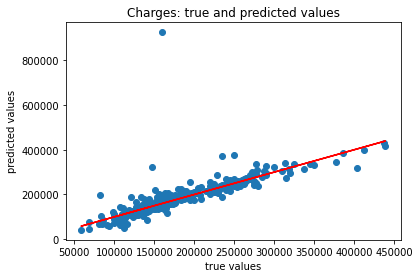




Mean absolute error of the prediction is: 21544.05707982122
Mean squared error of the prediction is: 2956359733.7587595
Root mean squared error of the prediction is: 54372.41703068533
Mean absolute percentage error of the prediction is: 13.398056574098327


In [ ]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()
print('\n\n')
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

FIRST MODEL 
- R-squared:	0.827
- Adj. R-squared:	0.824
- F-statistic:	250.6
- Prob (F-statistic):	0.00
- AIC:	25400.0
- BIC:	25500.0

Mean absolute error of the prediction is: 23365.34811805164\
Mean squared error of the prediction is: 2269430398.3354983\
Root mean squared error of the prediction is: 47638.53900294905\
Mean absolute percentage error of the prediction is: 14.199151194424916


SECOND MODEL
- R-squared:	0.871
- Adj. R-squared:	0.865
- F-statistic:	146.3
- Prob (F-statistic):	0.00
- AIC:	25140.0
- BIC:	25380.0


Mean absolute error of the prediction is: 21544.05707982122\
Mean squared error of the prediction is: 2956359733.7587595\
Root mean squared error of the prediction is: 54372.41703068533\
Mean absolute percentage error of the prediction is: 13.398056574098327
